# nnPU_TensorFlow

- 論文
    - [Positive-Unlabeled Learning with Non-Negative Risk Estimator](https://arxiv.org/abs/1703.00593)
- code
    - [nnPUlearning/pu_loss.py at master · kiryor/nnPUlearning](
        https://github.com/kiryor/nnPUlearning/blob/master/pu_loss.py)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Path" data-toc-modified-id="Path-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#Import-2" data-toc-modified-id="Import-2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Import 2</a></span></li></ul></li><li><span><a href="#PU-Learning" data-toc-modified-id="PU-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PU Learning</a></span><ul class="toc-item"><li><span><a href="#Data-Plot" data-toc-modified-id="Data-Plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Plot</a></span></li><li><span><a href="#Softmax-with-Regression" data-toc-modified-id="Softmax-with-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Softmax with Regression</a></span></li></ul></li><li><span><a href="#PU_loss" data-toc-modified-id="PU_loss-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PU_loss</a></span><ul class="toc-item"><li><span><a href="#Try" data-toc-modified-id="Try-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Try</a></span></li><li><span><a href="#def" data-toc-modified-id="def-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>def</a></span></li></ul></li><li><span><a href="#End" data-toc-modified-id="End-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>End</a></span></li></ul></div>

## Config

### Import

In [1]:
import os,sys
import re
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn
from sklearn import datasets

seed = 0
np.random.seed(seed=seed)

print("numpy ver: {}".format(np.__version__))
print("scikit-learn ver: {}".format(sklearn.__version__))

numpy ver: 1.15.0
scikit-learn ver: 0.19.2


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### TensorFlow

In [2]:
#____________________________________________________________________________________________________
#  TensorFlow and Keras GPU configures
##________________________________________________________________________________
##  OPTIONAL : set a GPU viewed by TensorFlow
###____________________________________________________________
###  - https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
##________________________________________________________________________________


##________________________________________________________________________________
##  TensorFlow
###____________________________________________________________
import tensorflow as tf
print("tensorflow ver: {}".format(tf.__version__))
###  eager mode
tf.enable_eager_execution()
print("tf.executing_eagerly(): {}".format(tf.executing_eagerly()))

# You can double check that you have the correct devices visible to TF
#   - https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
from tensorflow.python.client import device_lib
print("""
________________________________________
Visible GPUs from TensorFlow
________________________________________""")
for _device in device_lib.list_local_devices():
    match = re.search(pattern=r'name: "/device:(?P<name>[A-Z]{3}):(?P<device_num>\d{1})*',
                      string=str(_device))
    if match is None:
        print("Not Match")
        continue
    if match.group("name") == "CPU":
        name, device_num = match.group("name", "device_num")
        print()
        print("({}:{})".format(name, device_num))
        continue
    name, device_num = match.group("name", "device_num")
    match = re.search(pattern=r'.*pci bus id: (?P<pci_bus_id>\d{4}:\d{2}:\d{2}.\d{1}).*',
                      string=str(_device))
    if match is None:
        print("No GPUs")
        continue
    print("({}:{}: pci_bus_id: {})".format(name, device_num, match.group("pci_bus_id")))
print("________________________________________")

###____________________________________________________________
###  Computational Graph
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

###____________________________________________________________
###  sessioin
global _SESSION
config = tf.ConfigProto(allow_soft_placement=True,
                        log_device_placement=True)
config.gpu_options.allow_growth = True
#_SESSION = tf.Session(config=config)
###____________________________________________________________
##________________________________________________________________________________
#____________________________________________________________________________________________________

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


tensorflow ver: 1.9.0
tf.executing_eagerly(): True

________________________________________
Visible GPUs from TensorFlow
________________________________________

(CPU:0)
(GPU:0: pci_bus_id: 0000:02:00.0)
________________________________________


### Path

In [3]:
HOME = Path(os.getcwd()).parent
print(HOME)

/home/pollenjp/workdir/git/article_script/20180821__semi-supervised_learning__in_kabuku


In [4]:
path_list = []
data_Path = HOME / "data"
path_list.append(data_Path)
raw_Path = data_Path / "raw"
path_list.append(raw_Path)
plot_images_Path = data_Path / "plot_images"
path_list.append(plot_images_Path)
src_Path = HOME / "src"
path_list.append(src_Path)

for _Path in path_list:
    _path = str(_Path)
    if not os.path.exists(_path):
        os.makedirs(name=_path)
        print("make a directory: \n\t", _path)
    else:
        print(os.path.exists(_path), ": ", _path)

True :  /home/pollenjp/workdir/git/article_script/20180821__semi-supervised_learning__in_kabuku/data
True :  /home/pollenjp/workdir/git/article_script/20180821__semi-supervised_learning__in_kabuku/data/raw
True :  /home/pollenjp/workdir/git/article_script/20180821__semi-supervised_learning__in_kabuku/data/plot_images
True :  /home/pollenjp/workdir/git/article_script/20180821__semi-supervised_learning__in_kabuku/src


### Import 2

In [5]:
sys.path.append(str(src_Path / "models"))
sys.path.append(str(src_Path / "utils"))

In [6]:
from softmax_regression import SoftmaxRegression
from softmax_regression_pu import (WeightedUnlabelledSoftmaxRegression, HardBootstrappingSoftmaxRegression,
                                    UnlabelledExponentialLossSoftmaxRegression)
from utils import (fit_and_plot, synthesize_pu_labels)

## PU Learning

In [7]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=[[-3,0], [3,0]], random_state=seed)
Y = np.eye(2)[y]

### Data Plot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

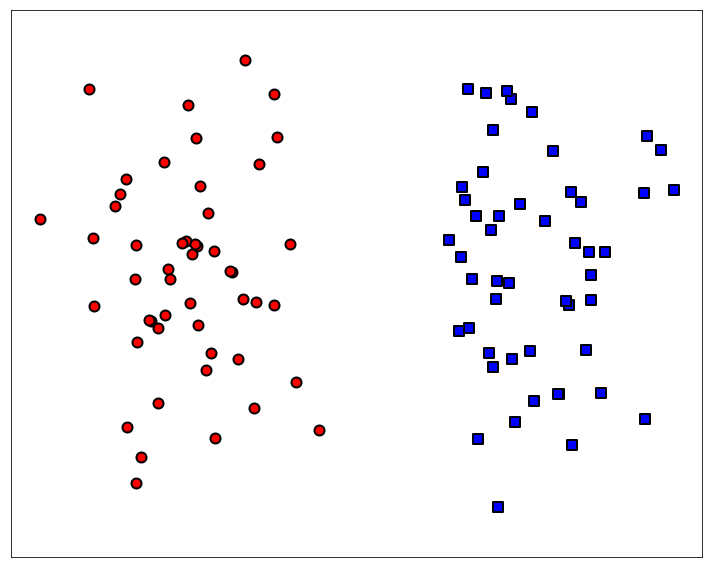

In [8]:
fit_and_plot(X, Y, classifier=None, marker_size=None, Y_true=None)

In [9]:
#____________________
marker_size = None
figsize = None
resolution = 0.02
#____________________
min_size, max_size = 5, 30  # min and max mark size
default_size = 10
if marker_size is None:
    marker_size = ["default"]
if not isinstance(marker_size, list):
    marker_size = [marker_size]

n_samples, n_classes = Y.shape
n_rows = len(marker_size)
n_cols = n_classes - 1
#S = np.ones((X.shape[0], n_rows)) * default_size  # default maker size
S = np.full(shape=(X.shape[0], n_rows), fill_value=default_size)


#____________________________________________________________
#  Classifier
if classifier:
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    # we create an instance of Neighbe the number of bootstrap resamples
    # (n_boot) or set ci to None.ours Classifier and fit the data.
    classifier.fit(X, Y)
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    def normalize_size(s, y_enc, min_size=5, max_size=30):
        """Normalize S to (min_size, max_size)."""
        N, K = y_enc.shape
        for k in range(K):
            is_k = y_enc[:, k] > 0.
            s_k = s[is_k]
            s_k = (s_k - np.min(s_k)) / (np.max(s_k) - np.min(s_k))
            s[is_k] = s_k * (max_size - min_size) + min_size
        return s

    for j in range(n_rows):
        cmaps = [plt.cm.RdBu, plt.cm.RdYlGn]
        for k in range(1, n_classes):
            z = Z[:, k]
            # Put the result into a color plot
            zz = z.reshape(xx.shape)
            axs[j, k - 1].contourf(xx, yy, zz,
                                   cmap=cmaps[k - 1], alpha=.6)
            # axs[j, k - 1].set_title(
            #     'Class {} probabilty, per instance {}'.format(
            #         k, marker_size[j]))

        if marker_size[j] == "gradient":
            G = classifier.calc_gradient(X, Y)
            G = np.abs(G)
            y = np.argmax(Y, axis=1)
            s = G[np.arange(n_samples), y]
            s = normalize_size(s, Y, min_size, max_size)
        elif marker_size[j] == "loss":
            L = classifier.calc_loss(X, Y)
            s = L.copy()
            s = normalize_size(s, Y, min_size, max_size)
        S[:, j] = s.copy()
#____________________________________________________________

#____________________________________________________________
#  Plot Data
##________________________________________
##  - different marker sizes and colors
if figsize is None:
    figsize=(7 * n_cols, 5 * n_rows)
f, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
#print(axs.shape)
#if isinstance(axs, matplotlib.axes.SubplotBase):
axs = np.array([axs])
if n_rows == 1:
    axs = np.expand_dims(axs, 0)
elif n_cols == 1:
    axs = np.expand_dims(axs, 1)

n_samples = Y.shape[0]
y = np.argmax(Y, axis=1)
y_flip = np.zeros(shape=n_samples, dtype=bool)

for k in range(1, n_classes):
    for j in range(n_rows):
        for idx in range(n_samples):
            if y_flip[idx] > 0:
                axs[j, k - 1].scatter(x=X[idx, 0], y=X[idx, 1], c=colors[y[idx]], marker=markers[y[idx]],
                                      s=10 * S[idx, j], edgecolor='black', linewidth='2', linestyle='dotted',
                                      label="{}番目のクラス".format(k) )
            else:
                axs[j, k - 1].scatter(x=X[idx, 0], y=X[idx, 1], c=colors[y[idx]], marker=markers[y[idx]],
                                      s=10 * S[idx, j], edgecolor='black', linewidth='2', linestyle='solid')
                                      #label="{}番目のクラス".format(k) )
                #axs[j, k - 1].scatter(X[idx, 0], X[idx, 1], c=colors[y[idx]],marker=markers[y[idx]],
                #                      s=10 * S[idx, j], edgecolor='black', linewidth='2', linestyle='solid')
        axs[k - 1, j].set_xlabel('$x_0$')
        axs[k - 1, j].set_ylabel('$x_1$')

        axs[j, k - 1].set_xlim(xx.min(), xx.max())
        axs[j, k - 1].set_ylim(yy.min(), yy.max())
        axs[j, k - 1].set_xticks(())
        axs[j, k - 1].set_yticks(())
        axs[j, k - 1].legend()
#____________________________________________________________
plt.tight_layout(w_pad=1.0, h_pad=1.0)

NameError: name 'classifier' is not defined

In [ ]:

if classifier:
    # we create an instance of Neighbe the number of bootstrap resamples
    # (n_boot) or set ci to None.ours Classifier and fit the data.
    classifier.fit(X, Y)
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    def normalize_size(s, y_enc, min_size=5, max_size=30):
        """Normalize S to (min_size, max_size)."""
        N, K = y_enc.shape
        for k in range(K):
            is_k = y_enc[:, k] > 0.
            s_k = s[is_k]
            s_k = (s_k - np.min(s_k)) / (np.max(s_k) - np.min(s_k))
            s[is_k] = s_k * (max_size - min_size) + min_size
        return s

    for j in range(n_rows):
        cmaps = [plt.cm.RdBu, plt.cm.RdYlGn]
        for k in range(1, n_classes):
            z = Z[:, k]
            # Put the result into a color plot
            zz = z.reshape(xx.shape)
            axs[j, k - 1].contourf(xx, yy, zz,
                                   cmap=cmaps[k - 1], alpha=.6)
            # axs[j, k - 1].set_title(
            #     'Class {} probabilty, per instance {}'.format(
            #         k, marker_size[j]))

        if marker_size[j] == "gradient":
            G = classifier.calc_gradient(X, Y)
            G = np.abs(G)
            y = np.argmax(Y, axis=1)
            s = G[np.arange(n_samples), y]
            s = normalize_size(s, Y, min_size, max_size)
        elif marker_size[j] == "loss":
            L = classifier.calc_loss(X, Y)
            s = L.copy()
            s = normalize_size(s, Y, min_size, max_size)
        S[:, j] = s.copy()

# Plot also the training points
ms = ['o', 's', '^']
cs = ['r', 'b', 'g']

n_samples = Y.shape[0]
y = np.argmax(Y, axis=1)
if Y_true is None:
    y_flip = np.zeros(n_samples, dtype=bool)
else:
    y_true = np.argmax(Y_true, axis=1)
    y_flip = np.logical_and(y == 0, y_true != 0)

for k in range(1, n_classes):
    for j in range(n_rows):
        for idx in range(n_samples):
            if y_flip[idx] > 0:
                axs[j, k - 1].scatter(X[idx, 0], X[idx, 1], c=cs[y[idx]],
                                      marker=ms[y[idx]], s=10 * S[idx, j],
                                      edgecolor='black', linewidth='2',
                                      linestyle='dotted')
            else:
                axs[j, k - 1].scatter(X[idx, 0], X[idx, 1], c=cs[y[idx]],
                                      marker=ms[y[idx]], s=10 * S[idx, j],
                                      edgecolor='black', linewidth='2',
                                      linestyle='solid')
        # axs[k - 1, j].set_xlabel('$x_0$')
        # axs[k - 1, j].set_ylabel('$x_1$')

        axs[j, k - 1].set_xlim(xx.min(), xx.max())
        axs[j, k - 1].set_ylim(yy.min(), yy.max())
        axs[j, k - 1].set_xticks(())
        axs[j, k - 1].set_yticks(())
# plt.show()
plt.tight_layout(w_pad=1.0, h_pad=1.0)

### Softmax with Regression

In [65]:
def layer1(X, n_neurons=1, name=None, activation=None):
    """
    X : shape(n_batch, features)
    """
    with tf.name_scope(name=name):
        n_inputs = int(X.shape[1])
        stddev = 2 / np.sqrt(n_inputs + n_neurons)
        init = tf.truncated_normal(shape=(n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(initial_value=init, name="kernel")
        b = tf.Variable(initial_value=tf.zeros(shape=[n_neurons], dtype=tf.float32), name="bias")
        Z = tf.matmul(a=X, b=W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [66]:
reset_graph

<function __main__.reset_graph(seed=42)>

In [67]:
with tf.name_scope(name="input"):
    X = tf.placeholder(dtype=tf.float32, shape=[None, 2], name="X_train")
    y = tf.placeholder(dtype=tf.int16,   shape=[None],    name="y_train")

In [68]:
with tf.name_scope("network"):
    logits = layer1(X=X, n_neurons=2, name="linear")

In [ ]:
with tf.name_scope("loss"):
    

## PU_loss

ここではラベルを論文やスライド資料に合わせて

```
- Positive  :  1
- Unlabeled : -1
```

として考える

### Try

In [96]:
#y_true = tf.constant(value=[[1, 0],
#                            [0, 1],
#                            [0, 1]], dtype=tf.int16)
#y_pred = tf.constant(value=[[0.7, 0.3],
#                            [0.2, 0.8],
#                            [0.4, 0.6]], dtype=tf.float32)

y_true = tf.constant(value=[1, 0, 0], dtype=tf.int16)
print(np.array(y_true))
#y_true = tf.cast(x=y_true, dtype=tf.float32)
#print(y_true)

y_pred = tf.constant(value=[[0.7],
                            [0.2],
                            [0.4]], dtype=tf.float32)
print(y_pred)

[1 0 0]
tf.Tensor(
[[0.7]
 [0.2]
 [0.4]], shape=(3, 1), dtype=float32)


In [97]:
logits = y_pred
labels = y_true
# positive and negative percentage is known beforehand
positive_pct = 0.2
loss_func = lambda x: tf.sigmoid(x=x)  # sigmoid: y = 1 / (1 + exp(-x))

logits  = tf.reshape(tensor=logits, shape=[-1])
y_label = tf.cast(x=tf.reshape(tensor=y_true, shape=[-1]), dtype=tf.float32)
assert logits.shape == y_label.shape

bool_positive, bool_unlabeled = tf.equal(x=y_label, y=1), tf.equal(x=y_label, y=0)

#  count positive and unlabel (Only Support |P| + |U| = |X| or |U| = |X| )
n_positive  = tf.cast(x=tf.maximum(x=tf.reduce_sum(input_tensor=y_label), y=1), dtype=tf.float32)  # y_label has 0 or 1
#  n_unlabeled =  "batch" - n_positive
n_unlabeled = tf.subtract(x=tf.cast(x=y_true.shape[0], dtype=tf.float32), y=n_positive)

#________________________________________
#  LOSS function like "Sigmoid Loss"
#positive_loss = self.loss_func(self.x_in)
positive_loss = loss_func(y_pred)
#unlabeled_loss = self.loss_func(-self.x_in)
unlabeled_loss = loss_func(-y_pred)
#________________________________________


#________________________________________
#  Compute Emperical Risk (経験損失)
##________________________________________
##  Use Only TensorFrow Operator for Automatic differentiation
###____________________
###  sum(positive_pct * bool_positive / n_positive * positive_loss)
positive_risk = tf.reduce_sum(
    input_tensor=tf.multiply(
        x=tf.divide(x=tf.multiply(x=positive_pct,
                                  y=tf.cast(x=bool_positive, dtype=tf.float32)),
                    y=n_positive),
        y=positive_loss), axis=None)
###____________________
###  sum((bool_unlabeled / n_unlabeled - positive_pct * bool_positive / n_positive) * unlabeled_loss)
negative_risk = tf.reduce_sum(
    input_tensor=tf.multiply(
        x=tf.subtract(x=tf.divide(x=tf.cast(x=bool_unlabeled, dtype=tf.float32),
                                  y=n_unlabeled),
                      y=tf.divide(x=tf.multiply(x=positive_pct,
                                                y=tf.cast(x=bool_positive, dtype=tf.float32)),
                                  y=tf.cast(n_positive, dtype=tf.float32))),
        y=unlabeled_loss), axis=None)
#________________________________________

In [98]:
print(positive_risk)
print(negative_risk)

tf.Tensor(0.3633419, shape=(), dtype=float32)
tf.Tensor(0.9466325, shape=(), dtype=float32)


In [99]:
nnPU = True
beta = 0.
gamma = 1.
total_risk = tf.add( x=positive_risk, y=negative_risk )

if nnPU:
    if negative_risk < -beta:
        print("negative_risk < -beta:")
        total_risk = tf.subtract( x=positive_risk, y=beta )
        loss = -gamma * negative_risk
    else:
        loss = total_risk
else:
    loss = total_risk

In [100]:
print(loss)

tf.Tensor(1.3099744, shape=(), dtype=float32)


### def

In [82]:
def nnPU_loss():
    # inputs =  [logits, y_label]
    # logits : shape(batch, 1)_0or1
    #      - [label]
    #      - ex: [P,U,P] -->  [[0],
    #                          [1],
    #                          [0]]
    # y_pred : shape(batch, 1)_Positive_Probability
    # classes: unlabel, positive
    #____________________________________________________________
    # positive and negative percentage is known beforehand
    positive_pct = 0.2
    loss_func = lambda x: tf.sigmoid(x=x)  # sigmoid: y = 1 / (1 + exp(-x))


    #y_label = tf.argmax(input=y_true, axis=1)
    y_label = tf.cast(x=tf.reshape(tensor=y_true, shape=[-1]), dtype=tf.float32)
    bool_positive, bool_unlabeled = tf.equal(x=y_label, y=1), tf.equal(x=y_label, y=0)

    #  count positive and unlabel (Only Support |P| + |U| = |X| or |U| = |X| )
    n_positive  = tf.cast(x=tf.maximum(x=tf.reduce_sum(input_tensor=y_label), y=1), dtype=tf.float32)  # y_label has 0 or 1
    #  n_unlabeled =  "batch" - n_positive
    n_unlabeled = tf.subtract(x=tf.cast(x=y_true.shape[0], dtype=tf.float32), y=n_positive)

    #________________________________________
    #  LOSS function like "Sigmoid Loss"
    #positive_loss = self.loss_func(self.x_in)
    positive_loss = loss_func(y_pred)
    #unlabeled_loss = self.loss_func(-self.x_in)
    unlabeled_loss = loss_func(-y_pred)
    #________________________________________


    #________________________________________
    #  Compute Emperical Risk (経験損失)
    ##________________________________________
    ##  Use Only TensorFrow Operator for Automatic differentiation
    ###____________________
    ###  sum(positive_pct * bool_positive / n_positive * positive_loss)
    positive_risk = tf.reduce_sum(
        input_tensor=tf.multiply(
            x=tf.divide(x=tf.multiply(x=positive_pct,
                                      y=tf.cast(x=bool_positive, dtype=tf.float32)),
                        y=n_positive),
            y=positive_loss), axis=None)
    ###____________________
    ###  sum((bool_unlabeled / n_unlabeled - positive_pct * bool_positive / n_positive) * unlabeled_loss)
    negative_risk = tf.reduce_sum(
        input_tensor=tf.multiply(
            x=tf.subtract(x=tf.divide(x=tf.cast(x=bool_unlabeled, dtype=tf.float32),
                                      y=n_unlabeled),
                          y=tf.divide(x=tf.multiply(x=positive_pct,
                                                    y=tf.cast(x=bool_positive, dtype=tf.float32)),
                                      y=tf.cast(n_positive, dtype=tf.float32))),
            y=unlabeled_loss), axis=None)
    #________________________________________

    nnPU = True
    beta = 0.
    gamma = 1.
    total_risk = tf.add( x=positive_risk, y=negative_risk )

    if nnPU:
        if negative_risk < -beta:
            print("negative_risk < -beta:")
            total_risk = tf.subtract( x=positive_risk, y=beta )
            loss = -gamma * negative_risk
        else:
            loss = total_risk
    else:
        loss = total_risk

## End